In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('../playground-series-s3e8/train.csv')
data.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


Introduction About the Data : The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

**id** : unique identifier of each diamond

**carat** : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.

**cut** : Quality of Diamond Cut

**color** : Color of Diamond

**clarity** : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.

**depth** : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)

**table** : A diamond's table is the facet which can be seen when the stone is viewed face up.

**x** : Diamond X dimension

**y** : Diamond Y dimension

**z** : Diamond Z dimension

Target variable:

**price** : Price of the given Diamond.

In [3]:
data['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

Check for Null values

In [4]:
data.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
f'Data shape: {data.shape[0]:,} x {data.shape[1]:,}'

'Data shape: 193,573 x 11'

 Drop `id` column      

In [6]:
data.drop(labels=['id'], axis=1, inplace=True)

Drop duplicated rows

In [7]:
data.duplicated().sum()

0

Getting numerical columns


In [8]:
num_columns = data.columns[data.dtypes!='object']
print(f"Numerical columns: {num_columns}")

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')


In [9]:
data[num_columns]

,carat,depth,table,x,y,z,price
0,1.52,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,61.6,56.0,4.38,4.41,2.71,666
4,1.70,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...
193568,0.31,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,62.9,55.0,4.45,4.49,2.81,681


Categorical columns

In [10]:
cat_columns = data.columns[data.dtypes=='object']
print(f"Categorical columns: {cat_columns}")

Categorical columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [11]:
data[cat_columns]

,cut,color,clarity
0,Premium,F,VS2
1,Very Good,J,SI2
2,Ideal,G,VS1
3,Ideal,G,VS1
4,Premium,G,VS2
...,...,...,...
193568,Ideal,D,VVS2
193569,Premium,G,VVS2
193570,Very Good,F,SI1
193571,Very Good,D,SI1


Getting distribution for each column

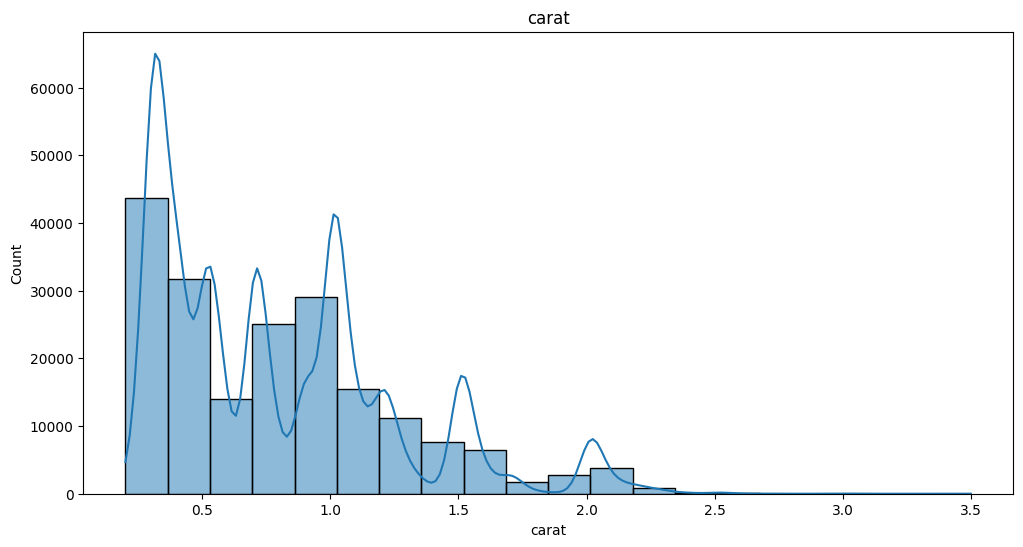

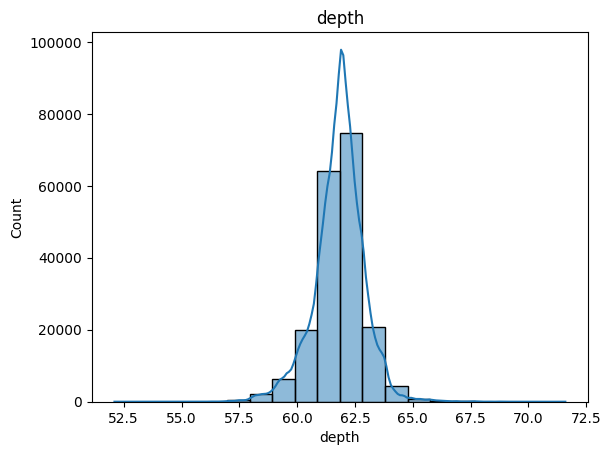

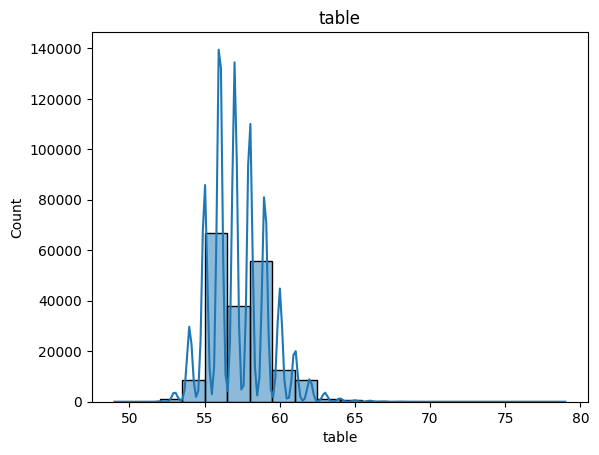

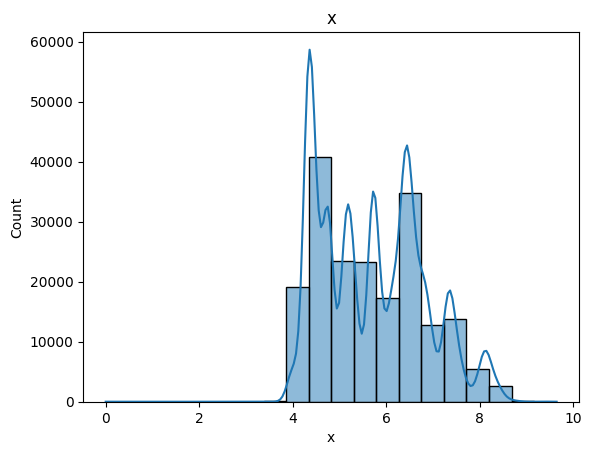

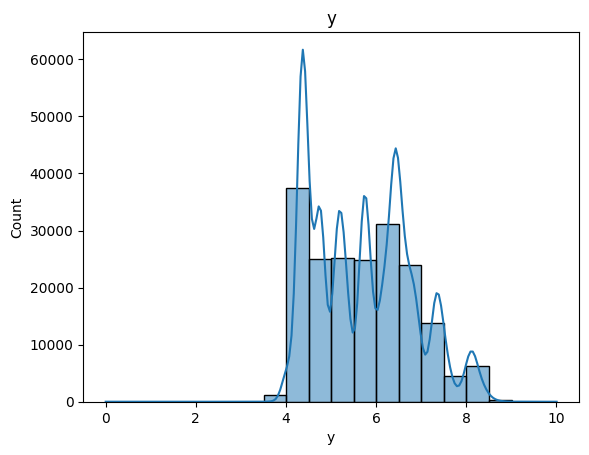

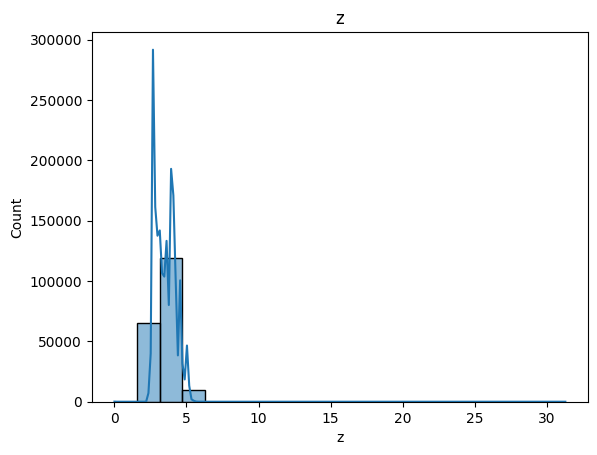

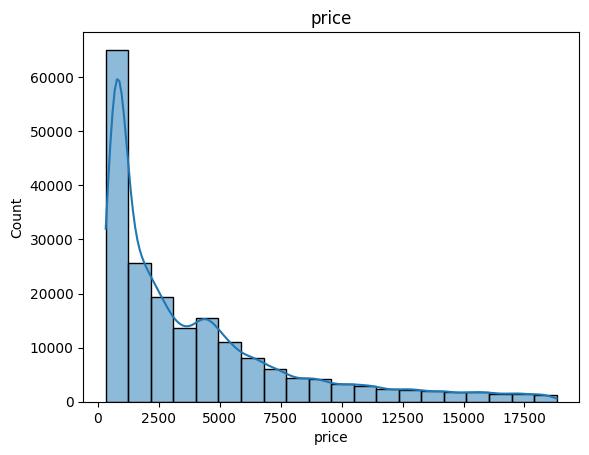

In [12]:
plt.figure(figsize=(12, 6))

for col in num_columns:
    sns.histplot(data=data, x=col, kde=True, bins=20)
    plt.title(col)
    plt.show()

<Axes: >

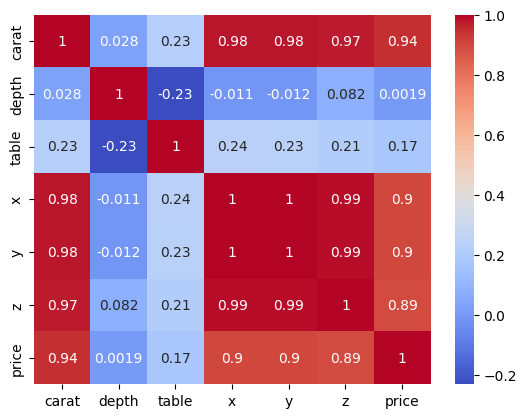

In [13]:
sns.heatmap(data=data[num_columns].corr(), annot=True, cmap='coolwarm')

Ordinal Encoding

In [14]:
cut_map = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
clarity_map = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}
color_map = {'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6, 'J': 7}

data['cut'] = data['cut'].map(cut_map)
data['clarity'] = data['clarity'].map(clarity_map)
data['color'] = data['color'].map(color_map)

### Model Building

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [16]:
data = pd.read_csv('../playground-series-s3e8/train.csv')

X = data.drop(labels=['id', 'price'], axis=1)
y = data['price']

In [17]:
num_columns = X.select_dtypes(exclude='object').columns
cat_columns = X.select_dtypes(include='object').columns

In [18]:
num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]
)


# Categorical sequences
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ["D", "E", "F", "G", "H", "I", "J"]
clarity_categories = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
cat_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OrdinalEncoder(categories=[cut_categories, color_categories, clarity_categories]))
    ]
)

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, num_columns),
        ('cat_pipeline', cat_pipeline, cat_columns)
    ] 
)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [21]:
X_train = preprocessor.fit_transform(X_train)

In [22]:
X_test = preprocessor.transform(X_test)

### Model train

In [23]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [24]:
models = {
    'RandomForest': RandomForestRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'XGBRegressor': XGBRegressor()
}

In [25]:
train_model_list = []
model_list = []
r2_score_list = []


for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Make predictions
    model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_true=y_test, y_pred=model.predict(X_test))
    mse = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))
    mae = mean_absolute_error(y_true=y_test, y_pred=model.predict(X_test))
    print(f"{model_name} - R2: {r2:.2f}, MSE: {mse:.2f}, MAE: {mae:.2f}")
    print("*"*50)


RandomForest - R2: 0.98, MSE: 368626.86, MAE: 309.24
**************************************************
XGBoost - R2: 0.98, MSE: 342736.69, MAE: 296.96
**************************************************
LinearRegression - R2: 0.94, MSE: 1013245.55, MAE: 671.59
**************************************************
Lasso - R2: 0.94, MSE: 1013790.39, MAE: 673.00
**************************************************
Ridge - R2: 0.94, MSE: 1013256.12, MAE: 671.61
**************************************************
XGBRegressor - R2: 0.98, MSE: 342736.69, MAE: 296.96
**************************************************
